# Heart Disease Classification 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

**Importing the dataset**

In [ ]:
dataset=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
dataset.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


**Exploring Data**

In [ ]:
dataset.shape

(253680, 22)

In [ ]:
dataset.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
dataset.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
dataset.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#pd.DataFrame(('HeartDiseaseorAttack':dataset[dataset['HeartDiseaseorAttack']==1].mean(),
#\'No HeartDiseaseorAttack':dataset[dataset['HeartDiseaseorAttack']==].mean(),\'All':dataset.mean()),
#index=dataset.columns))

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


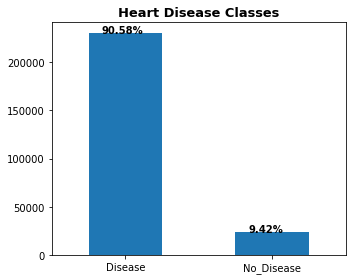

In [ ]:
print(dataset.HeartDiseaseorAttack.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = dataset.HeartDiseaseorAttack.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black', weight = 'bold')
    
plt.tight_layout()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64


Text(0, 0.5, 'Age distribution')

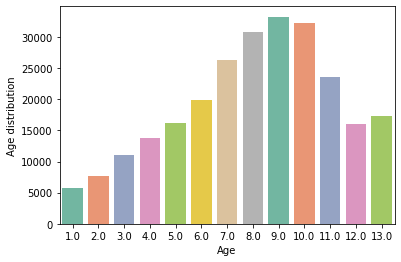

In [ ]:
print(dataset.Age.value_counts())
sns.barplot(x=dataset.Age.value_counts().index,
y=dataset.Age.value_counts().values,
palette='Set2')
plt.xlabel('Age')
plt.ylabel('Age distribution')

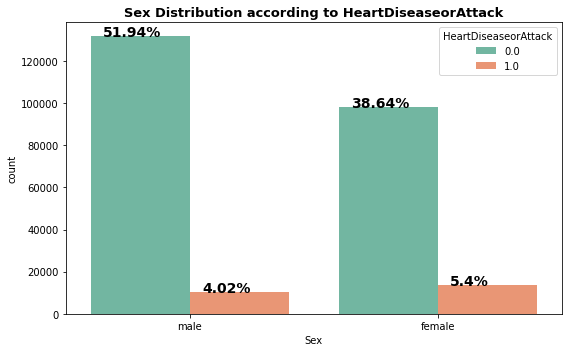

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = ['male','female']
ax = sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=dataset, palette='Set2')
ax.set_title("Sex Distribution according to HeartDiseaseorAttack", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')  
plt.tight_layout()

In [ ]:
dataset.duplicated().count()

253680

In [ ]:
dataset.drop_duplicates(inplace=True)

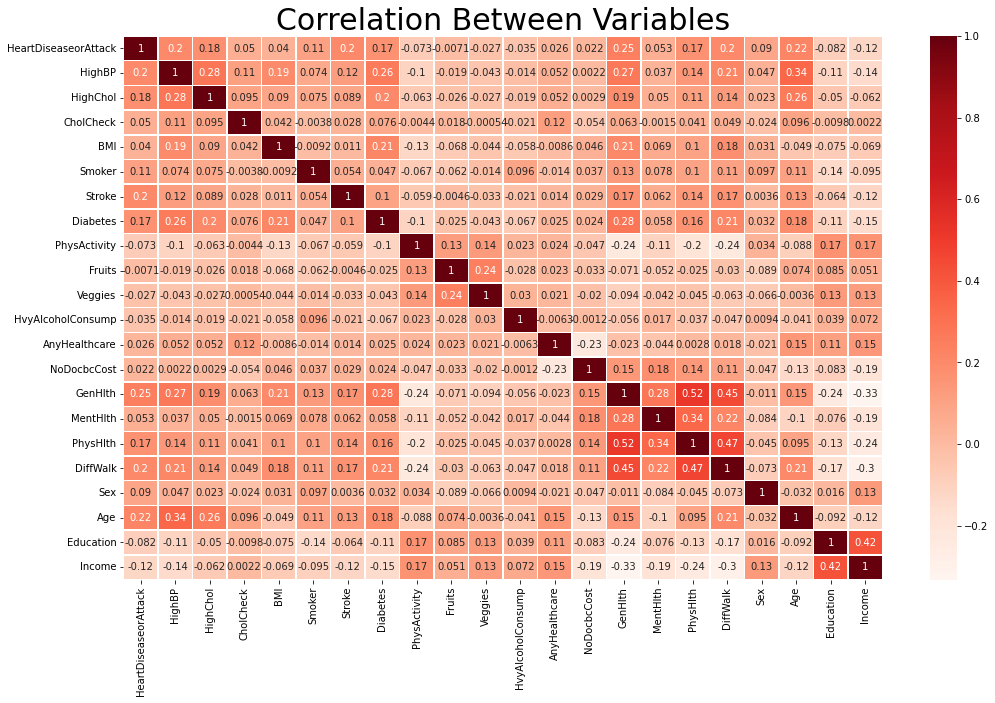

In [ ]:
#dataset.corr(method='pearson')
#sns.heatmap(dataset.corr());

plt.figure(figsize=(17, 10))
sns.heatmap(dataset.corr(), annot = True, linewidths=.5, cmap="Reds")
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

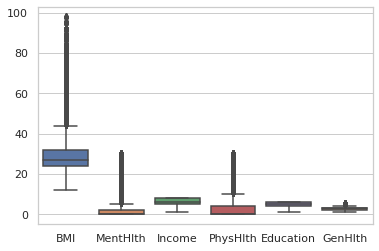

In [ ]:
l=['BMI','MentHlth','Income','PhysHlth','Education','GenHlth']

sns.set(style="whitegrid")
sns.boxplot(data=dataset[l],orient='v')
plt.show()

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

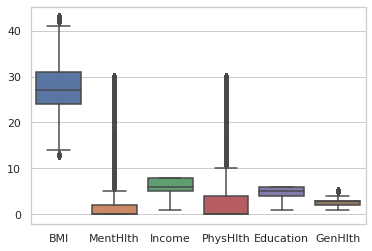

In [ ]:
dataset=remove_outlier(dataset,'BMI')
l=['BMI','MentHlth','Income','PhysHlth','Education','GenHlth']
sns.set(style="whitegrid")
sns.boxplot(data=dataset[l],orient='v')
plt.show()

In [ ]:
!pip install pycaret

In [ ]:
#import classification module from pycaret
from pycaret.classification import *

#intialize the setup
clf = setup(dataset, target = 'HeartDiseaseorAttack')


,Description,Value
0,session_id,7442
1,Target,HeartDiseaseorAttack
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(223094, 22)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# comparing different
# classification models
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9000,0.8387,0.1030,0.5737,0.1746,0.1480,0.2126,1.738
gbc,Gradient Boosting Classifier,0.8998,0.8394,0.1115,0.5628,0.1859,0.1573,0.2182,13.578
lr,Logistic Regression,0.8994,0.8363,0.1253,0.5463,0.2037,0.1719,0.2268,8.554
ada,Ada Boost Classifier,0.8991,0.8357,0.1379,0.5353,0.2192,0.1849,0.2348,3.759
ridge,Ridge Classifier,0.8989,0.0000,0.0295,0.6875,0.0566,0.0486,0.1281,0.126
dummy,Dummy Classifier,0.8972,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.076
svm,SVM - Linear Kernel,0.8966,0.0000,0.0738,0.4978,0.1109,0.0921,0.1362,2.248
lda,Linear Discriminant Analysis,0.8944,0.8302,0.1872,0.4651,0.2669,0.2210,0.2478,0.615
rf,Random Forest Classifier,0.8929,0.8026,0.1083,0.4183,0.1720,0.1355,0.1718,14.541
et,Extra Trees Classifier,0.8871,0.7767,0.1313,0.3632,0.1928,0.1463,0.1685,16.850


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5718, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# **LightGBM Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import seaborn as sns 

**spliting data**

In [ ]:
x=dataset.iloc[:,1:22]
y=dataset['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=z, random_state=2)

In [ ]:
print(x.shape, X_train.shape, X_test.shape)

(223094, 21) (178475, 21) (44619, 21)


**LightGBM Model Training**

In [ ]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5718, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5718, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Model prediction**

In [ ]:
y_pred=lgbm.predict(X_test)

**Model accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, y_pred)))

LightGBM Model accuracy score: 0.9000


**Comparing Train set to test set accuracy**

In [ ]:
y_pred_train = lgbm.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))

Training-set accuracy score: 0.9017


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[39708   331]
 [ 4133   447]]

True Positives(TP) =  39708

True Negatives(TN) =  447

False Positives(FP) =  331

False Negatives(FN) =  4133


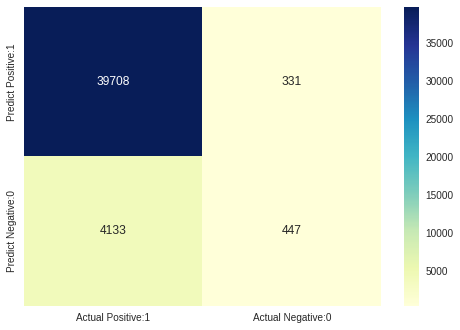

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
tp,fn,fp,tn = confusion_matrix(Y_test, y_pred, labels=[1,0]).ravel()
print(tp,tn,fp,fn)
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)

447 39708 331 4133
The precision rate is:  0.5745501285347043
The recall rate is:  0.09759825327510917


In [ ]:
print(lgbm.predict([[1,1,1,34.5,1,0,0,1,1,0,1,1,0,4,0,0,1,1,60,6,8]]))

[0.]


**Roc curve**

[0.2634598  0.00299439 0.01287805 ... 0.01892622 0.24539135 0.01898612]


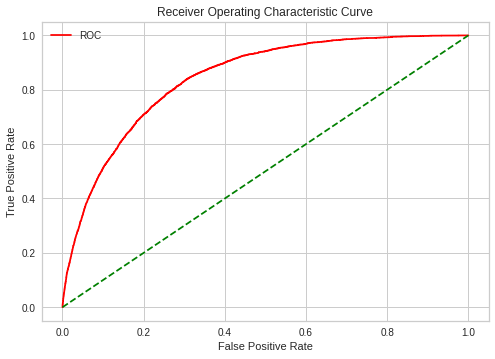

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
prob = lgbm.predict_proba(X_test)[:, 1]
print(prob)
fper, tper, thresholds = roc_curve(Y_test, prob)
plot_roc_curve(fper, tper)

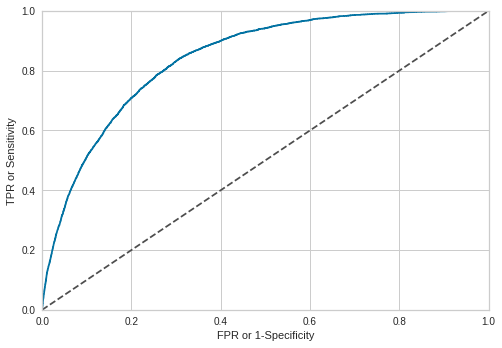

In [ ]:
fpr, tpr, threshold =roc_curve(Y_test, prob)
fig, ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0,1], [0,1], transform = ax.transAxes, ls="--", c="0.3")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel("FPR or 1-Specificity")
plt.ylabel("TPR or Sensitivity")
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.show()

In [ ]:
auc(fpr, tpr)

0.8422956858329504

 not bad xD  good model  

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lgbm, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = dataset.drop("HeartDiseaseorAttack", 1).columns.tolist())

Weight,Feature
0.0024 ± 0.0004,GenHlth
0.0019 ± 0.0005,Stroke
0.0012 ± 0.0009,Age
0.0008 ± 0.0004,Sex
0.0006 ± 0.0004,HighBP
0.0005 ± 0.0002,HighChol
0.0004 ± 0.0003,DiffWalk
0.0004 ± 0.0005,Smoker
0.0001 ± 0.0002,PhysHlth
0.0001 ± 0.0005,Income


GenHlth and Stroke are highly yaamlou sakta 9albeya 


# **ExtraTreesClassifier for Feature Selection**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x, y)
feature_importance = clf.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in clf.estimators_],axis = 0)

In [ ]:
for i,v in enumerate(feature_importance_normalized):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00687
Feature: 1, Score: 0.00434
Feature: 2, Score: 0.00045
Feature: 3, Score: 0.00328
Feature: 4, Score: 0.00354
Feature: 5, Score: 0.00567
Feature: 6, Score: 0.00414
Feature: 7, Score: 0.00438
Feature: 8, Score: 0.00269
Feature: 9, Score: 0.00227
Feature: 10, Score: 0.00133
Feature: 11, Score: 0.00112
Feature: 12, Score: 0.00165
Feature: 13, Score: 0.00591
Feature: 14, Score: 0.00310
Feature: 15, Score: 0.00372
Feature: 16, Score: 0.00978
Feature: 17, Score: 0.00409
Feature: 18, Score: 0.00869
Feature: 19, Score: 0.00836
Feature: 20, Score: 0.00799


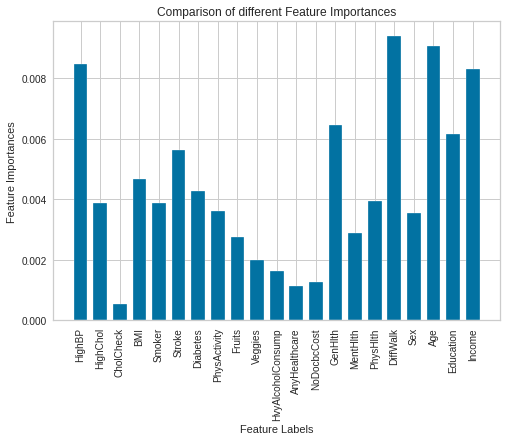

In [ ]:
plt.bar(x.columns, feature_importance_normalized,width = 0.7)
plt.xticks( rotation = 90)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

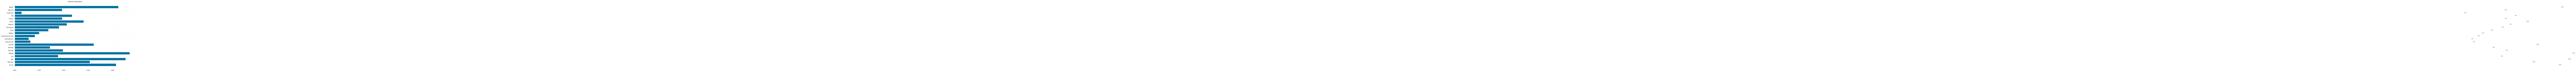

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(x.columns, feature_importance_normalized)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False) 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
# Show top values
ax.invert_yaxis() 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,str(round((i.get_width()), 2)),fontsize = 10, fontweight ='bold',color ='grey')
# Add Plot Title
ax.set_title('features importance',loc ='center', )
# Show Plot
plt.show()

# **Dimensionality Reduction** 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, dataset['HeartDiseaseorAttack']], axis = 1)
PCA_df['HeartDiseaseorAttack'] = LabelEncoder().fit_transform(PCA_df['HeartDiseaseorAttack'])
PCA_df.head()


,PC1,PC2,HeartDiseaseorAttack
0,14.124447,1.562222e-15,0
1,-14.124447,1.562222e-15,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0


In [ ]:
PCA_df.isna().sum().sum()

446184

barcha nan values c pas normal 

In [ ]:
PCA_df['PC1'].isna().sum()


223092

**LGBM after PCA**


In [ ]:
w=PCA_df.iloc[:,0:2]
z=PCA_df['HeartDiseaseorAttack']

In [ ]:
w

,PC1,PC2
0,14.124447,1.562222e-15
1,-14.124447,1.562222e-15
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
253674,NaN,NaN
253676,NaN,NaN
253677,NaN,NaN
253678,NaN,NaN


In [ ]:
z.value_counts()

0    200194
1     22900
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=z, random_state=2)

In [ ]:
print(w.shape, X_train.shape, X_test.shape)

(223094, 2) (178475, 21) (44619, 21)


In [ ]:
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5718, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5718, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, y_pred)))

LightGBM Model accuracy score: 0.9000


In [ ]:
y_pred_train = lgbm.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)))

Training-set accuracy score: 0.9017


In [ ]:
clf = setup(PCA_df, target = 'HeartDiseaseorAttack')


,Description,Value
0,session_id,4055
1,Target,HeartDiseaseorAttack
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(223094, 3)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:40:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,SVM - Linear Kernel


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7972,0.0,0.0005,0.6541,0.7144,0.0007,0.0021,4.663
nb,Naive Bayes,0.7873,0.0,0.0005,0.6454,0.7093,0.0012,0.0021,57.799


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:40:55
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ridge Classifier


# Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
#random forest classifier     
data_X, cls_lab = make_classification(n_samples=2100, n_classes=2, weights=[1,1], random_state=2)
train_X, test_X, train_y, test_y = train_test_split(data_X, cls_lab, test_size=0.5, random_state=2)
model =RandomForestClassifier()
model.fit(train_X, train_y)
y_pred=model.predict(test_X)
accuracy=accuracy_score(y_pred, test_y)
print(accuracy)


0.960952380952381


In [ ]:
y_pred_train = model.predict(train_X)
acc = accuracy_score(train_y, y_pred_train)
print(acc)


1.0


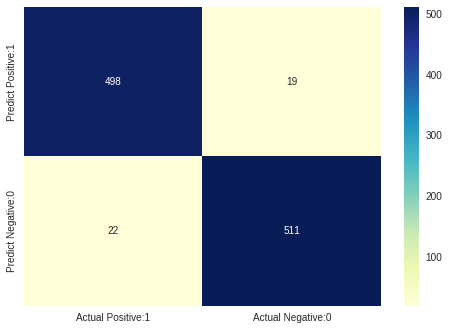

In [ ]:
cm = confusion_matrix(test_y, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [ ]:
tp,fn,fp,tn = confusion_matrix(test_y, y_pred, labels=[1,0]).ravel()
print(tp,tn,fp,fn)
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)

511 498 19 22
The precision rate is:  0.9641509433962264
The recall rate is:  0.9587242026266416


[[1.   0.  ]
 [0.95 0.05]
 [0.96 0.04]
 ...
 [0.98 0.02]
 [0.98 0.02]
 [0.99 0.01]]


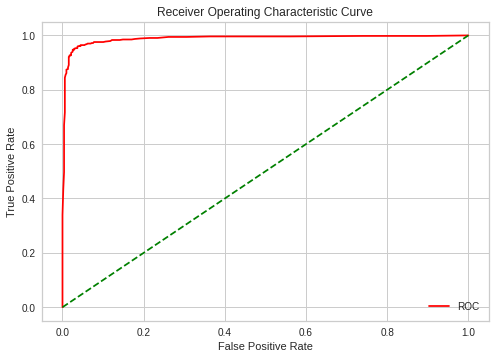

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
prob = model.predict_proba(test_X)
print(prob)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(test_y, prob)
plot_roc_curve(fper, tper)

In [ ]:
auc(fper, tper)

0.9884707923109584

In [ ]:
print(model.predict([[1,1,1,34.5,1,0,0,1,1,0,1,1,0,4,0,1,1,60,6,8]]))

[1]
